# Import Packages

In [1]:
import warnings  # Suppress warnings
from time import time  # Calculate training time.

import matplotlib
import pandas as pd
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

warnings.filterwarnings("ignore")

# Summarize software libraries used.
print("Libraries used in this project:")
print("- Pandas {}".format(pd.__version__))
print("- Surprise {}".format(surprise.__version__))

Libraries used in this project:
- Pandas 2.0.3
- Surprise 1.1.4


# Load the Dataset

The first step is to load the data and transform the array into a pandas data frame.

In [2]:
book_ratings = pd.read_csv(
    "https://raw.githubusercontent.com/tyrantdavis/datasets/refs/heads/main/goodreads_ratings.csv"
)

book_ratings.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,d089c9b670c0b0b339353aebbace46a1,7686667,3337e0e75701f7f682de11638ccdc60c,3,"Like Matched, this book felt like it was echoi...",Fri Apr 29 14:45:32 -0700 2011,Mon Feb 02 12:57:57 -0800 2015,Sat Jun 18 00:00:00 -0700 2011,Thu May 19 00:00:00 -0700 2011,0,0
1,6dcb2c16e12a41ae0c6c38e9d46f3292,18073066,7201aa3c1161f2bad81258b6d4686c16,5,"WOW again! 4,5 Stars \n So i wont forget to me...",Thu Aug 01 02:15:18 -0700 2013,Mon Nov 18 14:49:26 -0800 2013,Mon Aug 19 00:00:00 -0700 2013,Mon Aug 12 00:00:00 -0700 2013,16,14
2,244e0ce681148a7586d7746676093ce9,13610986,07a203f87bfe1b65ff58774667f6f80d,5,The second novel was hot & heavy. Not only in ...,Sun Nov 23 18:17:50 -0800 2014,Sat May 16 20:34:19 -0700 2015,Fri Dec 19 00:00:00 -0800 2014,Sun Nov 23 00:00:00 -0800 2014,0,0
3,73fcc25ff29f8b73b3a7578aec846394,27274343,8be2d87b07098c16f9742020ec459383,1,What a maddening waste of time. And I unfortun...,Mon Oct 31 08:29:06 -0700 2016,Wed Apr 26 16:06:28 -0700 2017,Wed Apr 26 16:06:28 -0700 2017,Sun Apr 23 00:00:00 -0700 2017,0,1
4,f8880e158a163388a990b64fec7df300,11614718,a29c4ba03e33ad073a414ac775266c5f,4,4.5 stars! \n This was an awesome read! \n So ...,Tue Mar 26 10:55:30 -0700 2013,Mon Sep 08 09:57:05 -0700 2014,Sun Apr 20 09:26:41 -0700 2014,Fri Apr 18 00:00:00 -0700 2014,0,0


# Examine the Dataset

Examine the data types and check for any missing entries.

In [3]:
book_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       3500 non-null   object
 1   book_id       3500 non-null   int64 
 2   review_id     3500 non-null   object
 3   rating        3500 non-null   int64 
 4   review_text   3500 non-null   object
 5   date_added    3500 non-null   object
 6   date_updated  3500 non-null   object
 7   read_at       3167 non-null   object
 8   started_at    2395 non-null   object
 9   n_votes       3500 non-null   int64 
 10  n_comments    3500 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 300.9+ KB


In [4]:
book_ratings.isna().any(axis=None)

True

In [5]:
book_ratings.isna()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3495,False,False,False,False,False,False,False,False,True,False,False
3496,False,False,False,False,False,False,False,False,True,False,False
3497,False,False,False,False,False,False,False,False,True,False,False
3498,False,False,False,False,False,False,False,True,True,False,False


In [6]:
book_ratings.isnull().sum()

user_id            0
book_id            0
review_id          0
rating             0
review_text        0
date_added         0
date_updated       0
read_at          333
started_at      1105
n_votes            0
n_comments         0
dtype: int64

In [7]:
book_ratings.isna().sum()

user_id            0
book_id            0
review_id          0
rating             0
review_text        0
date_added         0
date_updated       0
read_at          333
started_at      1105
n_votes            0
n_comments         0
dtype: int64

**Spotlights**

- The dataset comprises 3500 rows and 11 columns in total.
- Among these columns, 7 are designated for object values, and 4 for integers.
- There are missing values for **read_at : 333** and **started_at : 1105**

# Examine Summary Statistics

In [8]:
book_ratings.describe()

,book_id,rating,n_votes,n_comments
count,3.500000e+03,3500.000000,3500.000000,3500.000000
mean,1.314011e+07,3.686000,3.038857,0.754286
std,9.143899e+06,1.251911,15.508018,3.474921
min,1.000000e+00,0.000000,0.000000,0.000000
25%,6.380978e+06,3.000000,0.000000,0.000000
50%,1.320679e+07,4.000000,0.000000,0.000000
75%,1.928702e+07,5.000000,1.000000,0.000000
max,3.589888e+07,5.000000,431.000000,77.000000


**Verify that each observations is independent**

In [9]:
# user_id	book_id	review_id
userids = book_ratings.user_id.nunique()
usersidcounts = book_ratings.user_id.count()
bookids = book_ratings.book_id.nunique()
booksidcounts = book_ratings.book_id.count()
reviewids = book_ratings.review_id.nunique()
reviewsidcounts = book_ratings.review_id.count()

# uniqueids = df.id.nunique()
# idcounts = df.id.count()
# print(f"All observations independent? {uniqueids == idcounts}\n")

print(f"All USERID observations independent? {userids == usersidcounts}\n")
print(f"All BOOKSID observations independent? {bookids == booksidcounts}\n")
print(f"All REVIEWID observations independent? {reviewids == reviewsidcounts}\n")

All USERID observations independent? False

All BOOKSID observations independent? False

All REVIEWID observations independent? True



**Spotlights**

- The values for user_id and book_id are not entirely unique, which is understandable since a single user can read multiple books, and a single book can be read by various users.
- The review_id entries are unique, with no duplicates present. This is logical because each user can only submit one review for a particular book.
- Overall, the data structure reflects typical reading and reviewing behaviors, highlighting the relationships between users and books effectively.

# Examine Ratings Distributions

<Axes: title={'center': 'Count Ratings Distrbutions'}, ylabel='rating'>

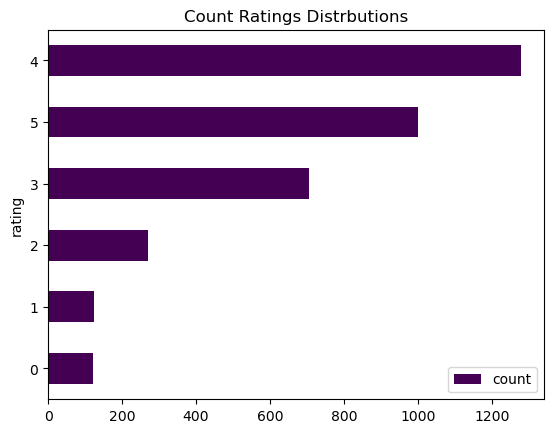

In [10]:
book_ratings.rating.value_counts(ascending=True).plot(
    kind="barh",
    title="Count Ratings Distrbutions",
    grid=False,
    legend=True,
    cmap="viridis",
)

**Spotlights** 

Rating Counts: 
- Rating 4: 1278
- Rating 5: 1001
- Rating 3: 707
- Rating 2: 269
- Rating 1: 125
- Rating 0: 120

Unfortunately, some data with ratings of 0 has been encountered , which is a bit of a hiccup since the website's ratings are meant to range from 1 to 5. To ensure everything aligns properly, any ratings that fall outside of this specified range will be removed.

# Filter Ratings 

In [11]:
book_ratings = book_ratings[book_ratings["rating"] != 0]

## Prepare Dataset for use in Surprise

In [12]:
reader = Reader(rating_scale=(1, 5))

# Build a recommender using `Surprise`

The following step involves importing book_ratings into a Surprise Dataset, enabling its compatibility with the algorithms provided by Surprise.

### Load 'book_ratings' into a Surprise Dataset

In [13]:
rec_data = Dataset.load_from_df(book_ratings[["user_id", "book_id", "rating"]], reader)